### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты $a$, $b$, $c$ и $d$ описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются животные-жертвы, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

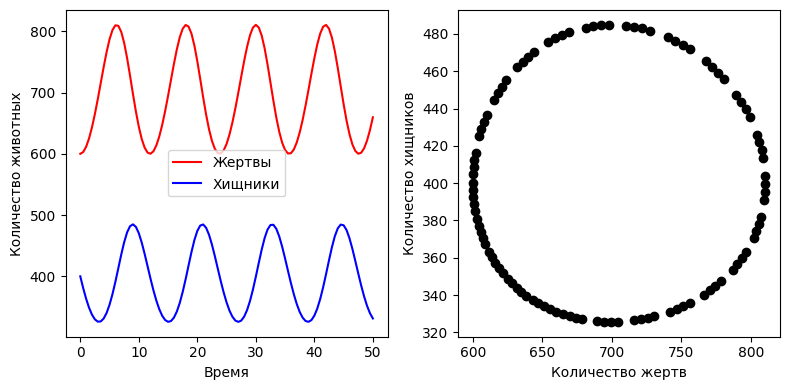

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

# Параметры модели
a, b, c, d = 0.4, 0.001, 0.001, 0.7

# Правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# Начальные условия
xy_vec0 = [600, 400]

# Сетка
t = np.linspace(0, 50, 101)

# Решение пакетным методом
xy_t = odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label = "Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label = "Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

plt.tight_layout()

Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

Сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

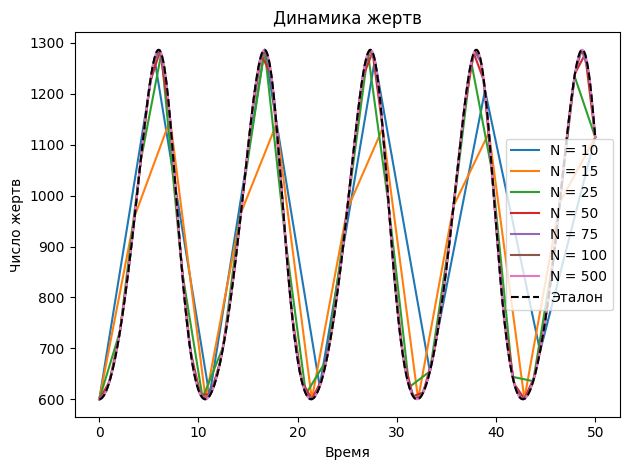

In [6]:
# Параметры модели
a, b, c, d = 0.4, 0.001, 0.001, 0.9

# Эталонное решение (сетка достаточно плотная)
t_ref = np.linspace(0, 50, 10001)
xy_vec0 = [600, 400]
xy_t_ref = odeint(f, xy_vec0, t_ref)

N_min     = 2
N_max     = 100
t_max     = 50
p         = 4
error_max = 10e-6

# for N in range(N_min, N_max):
#     t_N  = np.linspace(0, t_max, N)
#     t_2N = np.linspace(0, t_max, 2*N)
#     xy_t_N  = odeint(f, xy_vec0, t_N)
#     xy_t_2N = odeint(f, xy_vec0, t_2N)

#     error = (math.sqrt((xy_t_N[(N - 1), 0] - xy_t_2N[(2 * N - 1), 0]) ** 2 + (xy_t_N[(N - 1), 1] - xy_t_2N[(2 * N - 1), 1]) ** 2))/(2**p - 1)

#     if (error < error_max):
#         print (f"> Оптимальное количество узлов сетки N = {N}")
#         break

# Решения для разных N
Ns = [10, 15, 25, 50, 75, 100, 500]

for N in Ns:
    t    = np.linspace(0, t_max, N)
    xy_t = odeint(f, xy_vec0, t)

    plt.plot(t, xy_t[:, 0], label = f"N = {N}")

plt.plot(t_ref, xy_t_ref[:, 0], 'k--', label = "Эталон")
plt.title("Динамика жертв")
plt.xlabel("Время")
plt.ylabel("Число жертв")
plt.legend()

plt.tight_layout()
plt.show()

По выше приведенному графику можно определить, сколько узлов потребуется для адекватного разрешения физики задачи. При увеличении $a$ или $c$ или при уменьшении $b$ или $d$ для разрешения задачи ***требуется больше узлов***. При увеличении начального количества хищников или жертв потребуется меньше узлов, но при этом происходят резкие изменения популяций, как хищников, так и жертв.

### Часть 2. Метод высокого порядка

Задание: 
1. Выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и четвертого порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. Решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

Уравнения Лотки–Вольтерры: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, тогда
$$
  \bold{f} =
  \left( {\begin{array}{c}
    ax - bxy \\
    cxy - dy \\
  \end{array} } \right).
$$

Метод Эйлера (метод Рунге-Кутты первого порядка):
$$
\bold{x}_{n+1} = \bold{x}_n + h \cdot \bold{f}(t_n, \bold{x}_n).
$$

Метод Рунге-Кутты четвёртого порядка:
$$ k_1 = h f(t_n, u^n), $$
$$ k_2 = h f(t_n + \frac{h}{2}, u^n + \frac{k_1}{2}), $$
$$ k_3 = h f(t_n + \frac{h}{2}, u^n + \frac{k_2}{2}), $$
$$ k_4 = h f(t_n + h, u^n + k_3), $$
$$ u^{n+1} = u^n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}. $$

In [7]:
# Метод Эйлера
def euler(f, xy_vec0, t):
    N = len(t)
    try:
        n = len(xy_vec0)
    except TypeError:
        n = 1
        
    xy_vec = np.zeros((N, n))
    xy_vec[0] = xy_vec0

    for i in range(N - 1):
        h = t[i + 1] - t[i]
        xy_vec[i + 1] = xy_vec[i] + h * np.array(f(xy_vec[i], t))
    return xy_vec

# Метод Рунге-Кутты 4-го порядка
def rk4_method(f, xy_vec0, t):
    N = len(t)
    try:
        n = len(xy_vec0)
    except TypeError:
        n = 1
    xy_vec = np.zeros((N, n))
    xy_vec[0] = xy_vec0

    for i in range(N - 1):
        h = t[i + 1] - t[i]
        k1 = np.array(f(xy_vec[i], t[i]))
        k2 = np.array(f(xy_vec[i] + h / 2 * k1, t[i] + h / 2))
        k3 = np.array(f(xy_vec[i] + h / 2 * k2, t[i] + h / 2))
        k4 = np.array(f(xy_vec[i] + h * k3, t[i] + h))
        xy_vec[i + 1] = xy_vec[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return xy_vec

xy_odeint = odeint(f, xy_vec0, t)
xy_euler  = euler(f, xy_vec0, t)
xy_rk4    = rk4_method(f, xy_vec0, t)

print(f"> Решение, найденное с помощью odient:                       {xy_odeint[-1]}")
print(f"> Решение, найденное методом Эйлера:                         {xy_euler [-1]}")
print(f"> Решение, найденное методом Рунге-Кутты четвертого порядка: {xy_rk4   [-1]}")

> Решение, найденное с помощью odient:                       [1114.87756882  614.42386474]
> Решение, найденное методом Эйлера:                         [1780.01059456  192.0753286 ]
> Решение, найденное методом Рунге-Кутты четвертого порядка: [1114.87859382  614.42306617]


### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. Исследование порядка можно проводить на модельной задаче (не из постановки в задании).

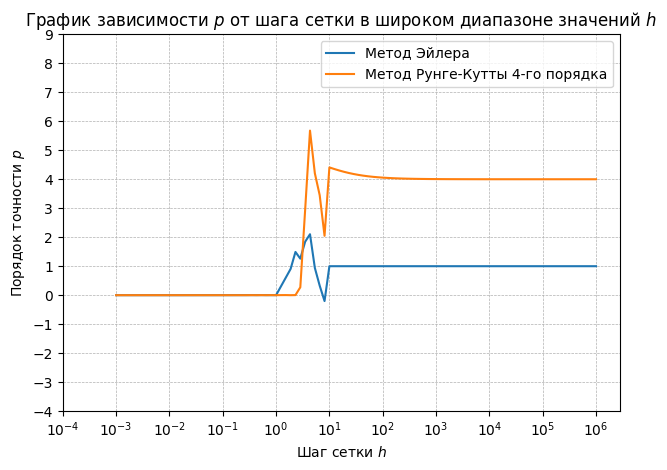

In [8]:
# Точное решение задачи y' = -y, y(0) = 1
def exact_solution(t):
    return np.exp(-t)

def f_model(y, t):
    return -y

y0 = 1
h_values = np.logspace(-3, 6, 100)
t_max = 5

# Оценка порядка точности
def calculate_order(method, f, y0, h_values, t_max):
    orders = []
    for h in h_values:
        # Сетки для h, h/2
        t_h = np.arange(0, t_max + h, h)
        t_h_half = np.arange(0, t_max + h / 2, h / 2)
        
        # Точные решения
        y_exact_h      = exact_solution(t_h)
        y_exact_h_half = exact_solution(t_h_half)
        
        # Численные решения
        y_h      = method(f, y0, t_h)
        y_h_half = method(f, y0, t_h_half)
        
        error_h      = np.max(np.abs(y_h - y_exact_h[:len(y_h)]))
        error_h_half = np.max(np.abs(y_h_half - y_exact_h_half[:len(y_h_half)]))
        
        orders.append(np.log2(error_h / error_h_half))
    return orders

# Оценка порядка для методов
orders_euler = calculate_order(euler, f_model, y0, h_values, t_max)
orders_rk4   = calculate_order(rk4_method, f_model, y0, h_values, t_max)

# Построение графика
plt.plot(h_values, orders_euler, label = "Метод Эйлера")
plt.plot(h_values, orders_rk4, label = "Метод Рунге-Кутты 4-го порядка")
plt.xscale("log")
plt.xlabel(r'Шаг сетки $h$')
plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6])
plt.ylabel(r'Порядок точности $p$')
plt.yticks(np.arange(-4, 10, 1))
plt.title(r'График зависимости $p$ от шага сетки в широком диапазоне значений $h$')
plt.legend()
plt.grid(which="both", linestyle="--", linewidth = 0.5)
plt.tight_layout()
plt.show()


В левой области на графике мы видим, что из-за ошибки округления, для обоих методов порядок точности на графике равен нулю. В правой части графика мы получили результат, согласованный с теорией.